# Natural Language Processing with Disaster Tweets

## Environment set-up

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import feature_extraction, linear_model, model_selection, preprocessing, metrics

# cross validation
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score

In [ ]:
# creating dataframe for each file
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Data Exploration

In [ ]:
# examples that is not a disaster tweet
df_train[df_train["target"] == 0].head()

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0


In [ ]:
# examples that is a disaster tweet
df_train[df_train["target"] == 1].head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Data Preparation

In [ ]:
df_train["text"][0:2]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

In [ ]:
# building vectors for the machine learning model
count_vectorizer = feature_extraction.text.CountVectorizer()

# example
example_vector = count_vectorizer.fit_transform(df_train["text"][0:2])

print(example_vector[0].todense().shape)
print(example_vector[1].todense().shape)

print(example_vector[0].todense())
print(example_vector[1].todense())

(1, 20)
(1, 20)
[[1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1]]
[[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0]]


In [ ]:
# turning all text in df_train and df_test into vectors
training_vector = count_vectorizer.fit_transform(df_train["text"])
testing_vector = count_vectorizer.transform(df_test["text"])

## Model Development

#### Below models will be used in the prediction

1.   Logistic Regression
2.   Ridge Regression
3.   Gradient Boosting Classifier

### Logistic Regression

In [ ]:
# creating the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model

LogisticRegression()

In [ ]:
# cross validation
logistic_cv_scores = cross_val_score(logistic_regression_model,
                                     training_vector,
                                     df_train["target"],
                                     cv = 5,
                                     scoring = "accuracy")

# fitting the logistic regression model
logistic_regression_model.fit(training_vector, df_train["target"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()

In [ ]:
# predicting with training dataset
y_pred_logistic = logistic_regression_model.predict(training_vector)

# confustion martrix
cm_logistic = confusion_matrix(df_train["target"], y_pred_logistic, labels = logistic_regression_model.classes_)

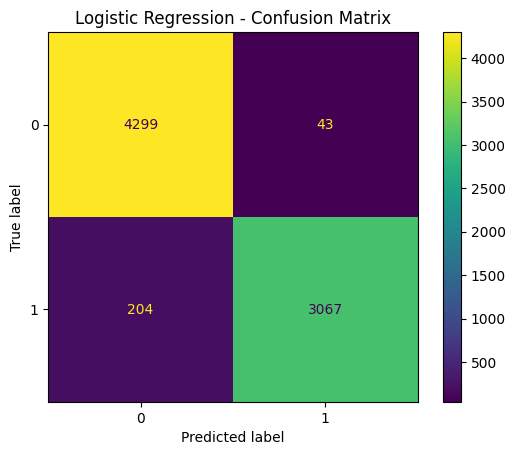

In [ ]:
# confustion matrix plot
disp_logistic = ConfusionMatrixDisplay(confusion_matrix = cm_logistic,
                                       display_labels = logistic_regression_model.classes_)

disp_logistic.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [ ]:
# true positive rate
3067/(3067 + 204)

0.9376337511464384

In [ ]:
# true negative rate
4299/(4299 + 43)

0.9900967296176877

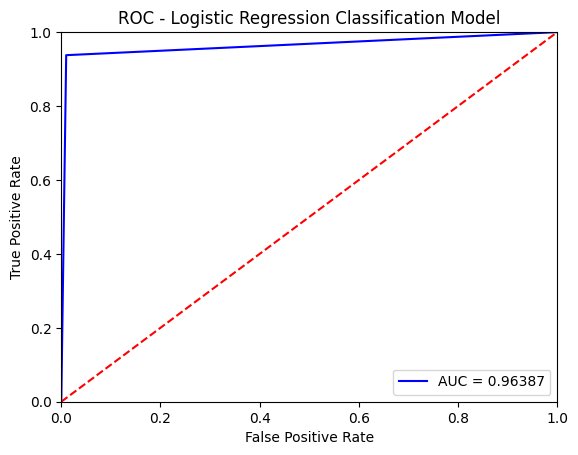

In [ ]:
# ROC Curve - logistic regression
fpr, tpr, threshold = roc_curve(df_train["target"], y_pred_logistic)
roc_auc = auc(fpr, tpr)

plt.title('ROC - Logistic Regression Classification Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
# model evaluation
accracy_logistic = metrics.accuracy_score(df_train["target"], y_pred_logistic)
f1_logistic = f1_score(df_train["target"], y_pred_logistic)

print(f'Cross-Validation Accuracy: {np.mean(logistic_cv_scores):.5f}')
print(f'Training Set Accuracy: {accracy_logistic:.5f}')
print(f'F1 Score: {f1_logistic:.5f}')

Cross-Validation Accuracy: 0.71063
Training Set Accuracy: 0.96756
F1 Score: 0.96129


### Ridge Regression

In [ ]:
# creating a ridge classfier model
ridge_model = linear_model.RidgeClassifier()
ridge_model

RidgeClassifier()

In [ ]:
# cross validation
ridge_cv_scores = cross_val_score(ridge_model,
                                  training_vector,
                                  df_train["target"],
                                  cv = 5,
                                  scoring = "accuracy")

# fitting the ridger classifier
ridge_model.fit(training_vector, df_train["target"])

RidgeClassifier()

In [ ]:
# prediction with training
y_pred_ridge = ridge_model.predict(training_vector)

# confusion matrix
cm_ridge = confusion_matrix(df_train["target"], y_pred_ridge, labels = ridge_model.classes_)

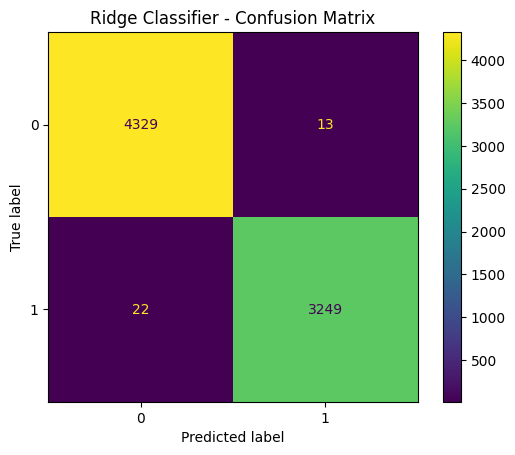

In [ ]:
# confustion matrix plot
disp_ridge = ConfusionMatrixDisplay(confusion_matrix = cm_ridge,
                                       display_labels = ridge_model.classes_)

disp_ridge.plot()
plt.title("Ridge Classifier - Confusion Matrix")
plt.show()

In [ ]:
# true positive rate
3249/(3249+22)

0.993274228064812

In [ ]:
# true negative rate
4329/(4329+13)

0.9970059880239521

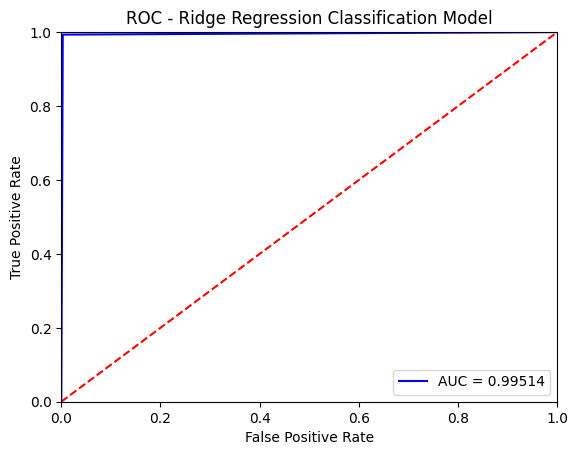

In [ ]:
# ROC Curve - ridge regression
fpr, tpr, threshold = roc_curve(df_train["target"], y_pred_ridge)
roc_auc = auc(fpr, tpr)

plt.title('ROC - Ridge Regression Classification Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
# model evaluation
accracy_ridge = metrics.accuracy_score(df_train["target"], y_pred_ridge)
f1_ridge = f1_score(df_train["target"], y_pred_ridge)

print(f'Cross-Validation Accuracy: {np.mean(ridge_cv_scores):.5f}')
print(f'Training Set Accuracy: {accracy_ridge:.5f}')
print(f'F1 Score: {f1_ridge:.5f}')

Cross-Validation Accuracy: 0.66715
Training Set Accuracy: 0.99540
F1 Score: 0.99464


### Gradient Boosting Classifier

In [ ]:
# defining a parameter grid for hypertuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# creating a gradient boosting classifier model
model_gb = GradientBoostingClassifier()

# hypertuning - randomized search CV
grid_search = RandomizedSearchCV(
    estimator = model_gb,
    param_distributions = param_grid,
    scoring = 'accuracy',
    cv = 5,
    n_iter = 3,
    n_jobs = -1
)

grid_search.fit(training_vector, df_train["target"])

# hypertuning - result
best_params = grid_search.best_params_
best_params

{'subsample': 0.9,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'learning_rate': 0.1}

In [ ]:
# cross validation
cv_gb = StratifiedKFold(n_splits = 5,
                        shuffle = True,
                        random_state = 42)

gb_cv_scores = cross_val_score(model_gb,
                               training_vector,
                               df_train["target"],
                               cv = cv_gb,
                               scoring = "accuracy")

In [ ]:
# creating a gradient boosting classifier model with the best hyperparameters
best_model_gb = GradientBoostingClassifier(**best_params)

# fit the model
best_model_gb.fit(training_vector, df_train["target"])

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=5,
                           n_estimators=200, subsample=0.9)

In [ ]:
# prediction with training set
y_pred_gb = best_model_gb.predict(training_vector)

# confusion matrix
cm_gb = confusion_matrix(df_train["target"], y_pred_gb, labels = best_model_gb.classes_)

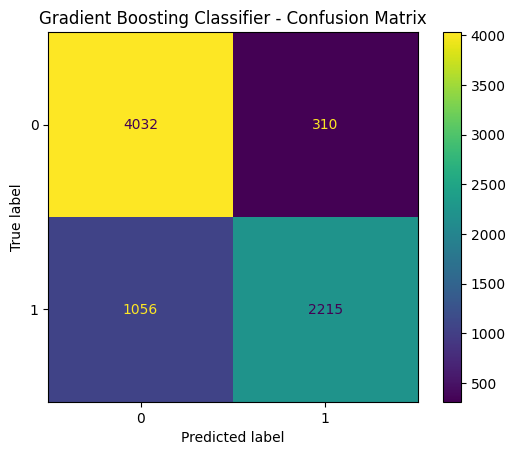

In [ ]:
# cm plot
disp_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb,
                                 display_labels = best_model_gb.classes_)
disp_gb.plot()
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.show()

In [ ]:
# true positive rate
2336/(2336 + 935)

0.7141546927545094

In [ ]:
# true negative rate
4074/(4074 + 268)

0.9382772915707047

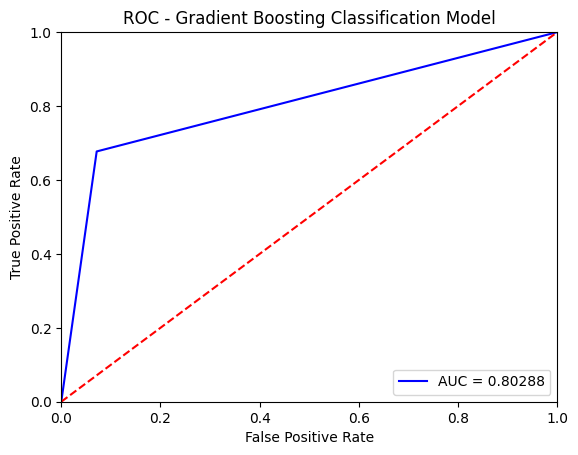

In [ ]:
# ROC Curve - gradient boosting classifier
fpr, tpr, threshold = roc_curve(df_train["target"], y_pred_gb)
roc_auc = auc(fpr, tpr)

plt.title('ROC - Gradient Boosting Classification Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
# model evaluation
accuracy_gb = metrics.accuracy_score(df_train["target"], y_pred_gb)
f1_gb = f1_score(df_train["target"], y_pred_gb)

print(f'Cross-Validation Accuracy: {np.mean(gb_cv_scores):.5f}')
print(f'Training Set Accuracy: {accuracy_gb:.5f}')
print(f'F1 Score: {f1_gb:.5f}')

Cross-Validation Accuracy: 0.76093
Training Set Accuracy: 0.82057
F1 Score: 0.76432


## Prediction with Testing dataset


This project will be evaluated using the F1 score between the predicted and expected answer. From above model development section, the ridge regression results in the highest F1 score using the training dataset. As a result, ridge regression classifier will be used in the prediction in testing dataset.

In [ ]:
df_submission = pd.read_csv("sample_submission.csv")
df_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
y_pred_logistic_test = ridge_model.predict(testing_vector)
df_submission["target"] = y_pred_logistic_test
df_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [ ]:
df_submission.to_csv("submission_marco.csv", index = False)